In [1]:
from glob import glob
import pandas as pd
from datetime import datetime
import numpy as np 
from tqdm.auto import tqdm
import seaborn as sns 
import matplotlib.pylab as plt

In [2]:
fn = glob(r'Z:\Teris\ASAP\expt_sessions\*\processed\df_pycontrol.pkl')

In [5]:
data = []
for f in tqdm(fn):
    df = pd.read_pickle(f)

    # calculate the spout rate
    time = (df.iloc[-1].time - df.iloc[0].time)/1000 #in sec
    spout_bar_count = np.sum((df.name=='spout') | (df.name=='bar_off'))
    spout_count = np.sum((df.name=='spout'))
    spout_rate = spout_count/time
    spout_bar_rate = spout_bar_count/time

    session_time = datetime.strptime(df.attrs['Start date'], '%Y/%m/%d %H:%M:%S')
    data.append(
        {
            'spout_rate': spout_rate,
            'spout_bar_off_rate': spout_bar_rate,
            'hour': session_time.hour,
            'task': df.attrs['Task name'],
            'session_length': time,
            'start_date': df.attrs['Start date'],
            'subject_id': df.attrs['Subject ID']
        }
    )
    
df_activity = pd.DataFrame(data)
df_activity

  0%|          | 0/163 [00:00<?, ?it/s]

C:\Users\ndcn1330\AppData\Local\Temp\ipykernel_12892\3276057560.py:9: RuntimeWarning: invalid value encountered in scalar divide
  spout_rate = spout_count/time
C:\Users\ndcn1330\AppData\Local\Temp\ipykernel_12892\3276057560.py:10: RuntimeWarning: invalid value encountered in scalar divide
  spout_bar_rate = spout_bar_count/time


,spout_rate,spout_bar_off_rate,hour,task,session_length,start_date,subject_id
0,0.403916,0.841845,11,reaching_go_spout_bar_nov22,705.593,2022/11/24 11:32:33,JC313L
1,0.335280,0.607454,11,reaching_go_spout_bar_nov22,1822.359,2022/11/25 11:33:18,JC313L
2,0.202500,0.461666,14,reaching_go_spout_bar_nov22,2400.002,2022/11/25 14:37:07,JC313L
3,0.276250,0.667499,15,reaching_go_spout_bar_nov22,2400.002,2022/11/28 15:19:34,JC313L
4,0.216604,0.516614,11,reaching_go_spout_bar_nov22,803.308,2022/11/29 11:31:47,JC313L
...,...,...,...,...,...,...,...
158,0.038333,0.220833,10,reaching_go_spout_bar_nov22,3600.002,2023/02/20 10:13:08,kms064
159,0.172500,0.446666,10,reaching_go_spout_bar_nov22,3600.002,2023/02/21 10:29:55,kms064
160,0.065278,0.525833,15,reaching_go_spout_bar_nov22,3600.002,2023/02/22 15:09:06,kms064
161,0.073384,0.306270,9,reaching_go_spout_bar_nov22,3297.741,2023/02/17 09:49:40,kms64


[Text(0, 0.5, 'Average rate of spout or bar_off (per second)')]

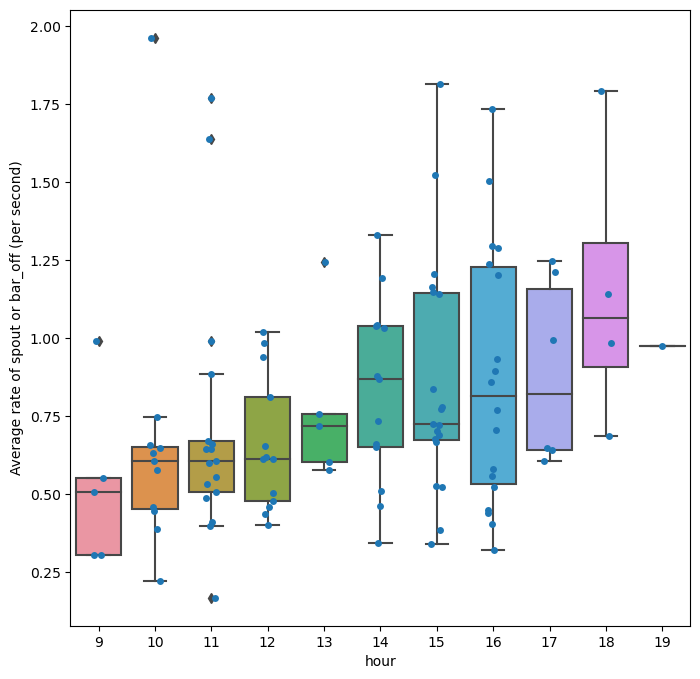

In [6]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
df2plot = df_activity[df_activity.task == 'reaching_go_spout_bar_nov22']
idx = (df2plot.session_length>60*15) & (df2plot.spout_rate<4) 
sns.stripplot(x='hour', y='spout_bar_off_rate', data=df2plot[idx], ax = ax)
sns.boxplot(x='hour', y='spout_bar_off_rate', data=df2plot[idx], ax = ax)
ax.set(ylabel='Average rate of spout or bar_off (per second)')

[Text(0, 0.5, 'Average rate of spout (per second)')]

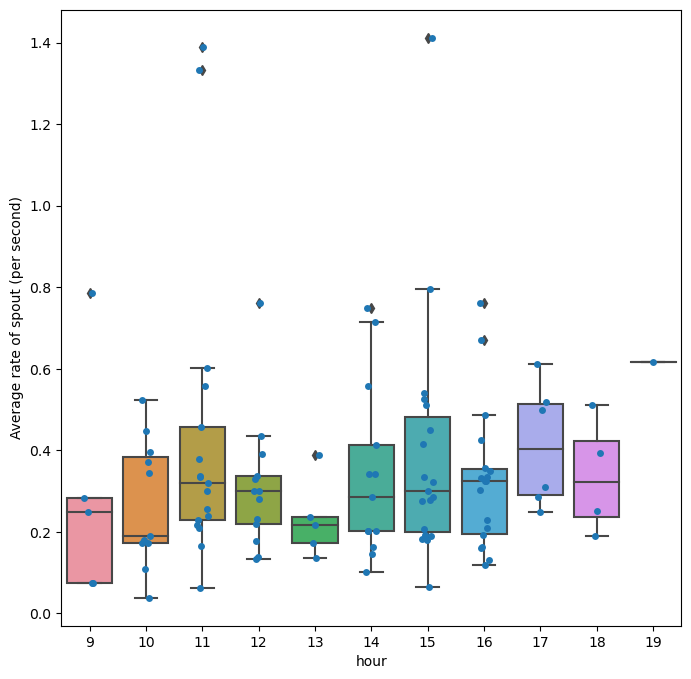

In [7]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
df2plot = df_activity[df_activity.task == 'reaching_go_spout_bar_nov22']
idx = (df2plot.session_length>60*15) & (df2plot.spout_rate<4) 
sns.stripplot(x='hour', y='spout_rate', data=df2plot[idx], ax = ax)
sns.boxplot(x='hour', y='spout_rate', data=df2plot[idx], ax = ax)
ax.set(ylabel='Average rate of spout (per second)')

<AxesSubplot: xlabel='hour', ylabel='spout_bar_off_rate'>

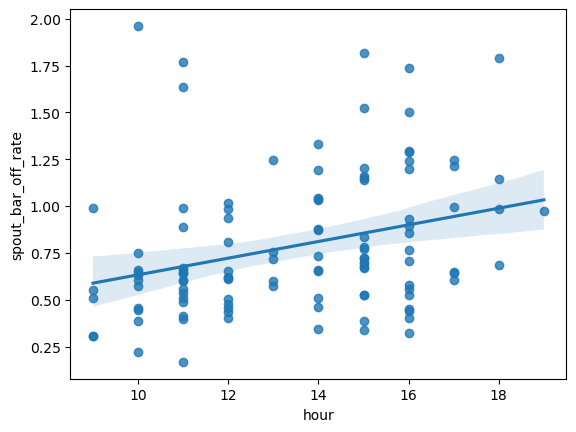

In [8]:
sns.regplot(x='hour', y='spout_bar_off_rate', data=df2plot[idx])

## Statistical tests

In [9]:
import statsmodels.api as sm
df_ols = df_activity[df_activity.task == 'reaching_go_spout_bar_nov22']
idx = (df_ols.session_length>60*15)
df_ols = df_ols[idx].dropna()
hour = sm.add_constant(df_ols.hour)
model = sm.OLS(df_ols.spout_bar_off_rate, hour)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     spout_bar_off_rate   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     5.541
Date:                Wed, 01 Mar 2023   Prob (F-statistic):             0.0203
Time:                        15:10:14   Log-Likelihood:                -108.94
No. Observations:                 113   AIC:                             221.9
Df Residuals:                     111   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0795      0.328      0.242      0.8

In [10]:
import statsmodels.api as sm
df_ols = df_activity[df_activity.task == 'reaching_go_spout_bar_nov22']
idx = (df_ols.session_length>60*15)
df_ols = df_ols[idx].dropna()
hour = sm.add_constant(df_ols.hour)
model = sm.OLS( df_ols.spout_rate, hour)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             spout_rate   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7317
Date:                Wed, 01 Mar 2023   Prob (F-statistic):              0.394
Time:                        15:10:14   Log-Likelihood:                -80.786
No. Observations:                 113   AIC:                             165.6
Df Residuals:                     111   BIC:                             171.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1758      0.256      0.687      0.4

ANOVA

In [35]:
from statsmodels.formula.api import ols

df_ols = df_activity[df_activity.task == 'reaching_go_spout_bar_nov22']
#remove the row with naming error
df_ols = df_ols[~df_ols.subject_id.isin(['kms64', 'v'])]
idx = (df_ols.session_length>60*15)
df_ols = df_ols[idx].dropna()


formula = 'spout_bar_off_rate ~ hour + C(subject_id) + hour:C(subject_id)'
lm = ols(formula, df_ols).fit()
aov_table = sm.stats.anova_lm(lm, type=2)
print(aov_table)

                      df     sum_sq   mean_sq         F    PR(>F)
C(subject_id)        9.0   7.570845  0.841205  2.027612  0.045005
hour                 1.0   0.272791  0.272791  0.657526  0.419574
hour:C(subject_id)   9.0   1.919426  0.213270  0.514058  0.860897
Residual            90.0  37.338727  0.414875       NaN       NaN


<AxesSubplot: xlabel='subject_id', ylabel='hour'>

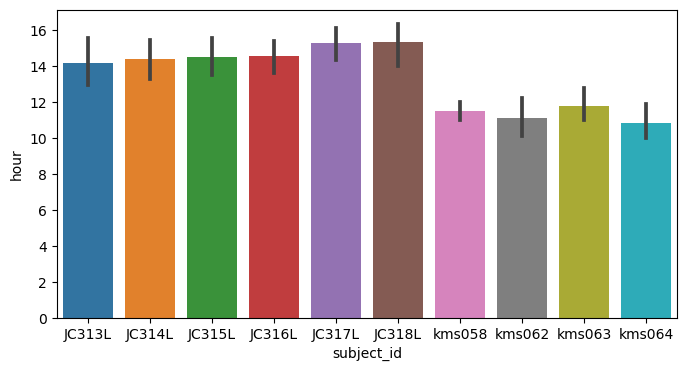

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(y='hour', x='subject_id', data=df_ols)

<AxesSubplot: xlabel='subject_id', ylabel='spout_bar_off_rate'>

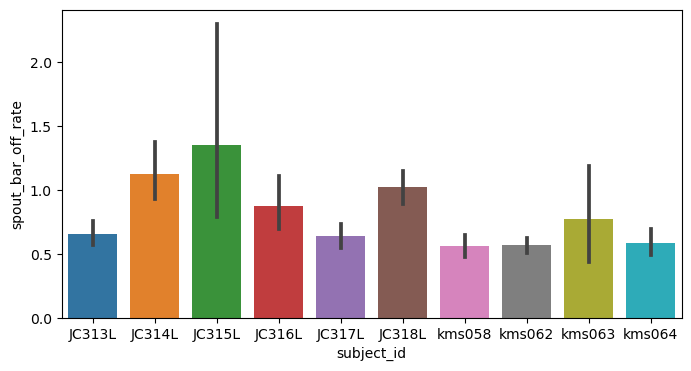

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(y='spout_bar_off_rate', x='subject_id', data=df_ols)